<a href="https://colab.research.google.com/github/Bornali13/FDS_FINAL/blob/main/Fda_wellbing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***Data Processing ***

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#Dataset merged
import pandas as pd

path = '/content/drive/MyDrive/FOD_A/'
# Load the datasets
df1 = pd.read_csv(path + 'dataset1.csv')
df2 = pd.read_csv(path + 'dataset2.csv')
df3 = pd.read_csv(path + 'dataset3.csv')

# Merge the datasets
merged_df = pd.merge(df1, df2, on='ID', how='inner')
merged_df = pd.merge(merged_df, df3, on='ID', how='inner')

# Save the merged dataset
merged_df.to_csv('merged_dataset.csv', index=False)

# Print the first few rows of the merged dataset
print(merged_df.head())


        ID  gender  minority  deprived  C_we  C_wk  G_we  G_wk  S_we  S_wk  \
0  1087192       0         0         0   2.0   0.5   0.5   0.5   1.0   0.5   
1  1087195       0         0         0   2.0   1.0   0.0   0.0   3.0   1.0   
2  1087205       0         0         0   1.0   0.5   0.0   0.0   0.5   0.5   
3  1087214       0         0         0   2.0   1.0   0.5   0.0   2.0   1.0   
4  1087222       0         0         0   1.0   3.0   0.0   0.0   2.0   1.0   

   ...  Engs  Dealpr  Thcklr  Goodme  Clsep  Conf  Mkmind  Loved  Intthg  \
0  ...     4       4       4       4      5     4       4      5       4   
1  ...     3       4       5       3      5     4       4      5       4   
2  ...     3       3       3       3      4     3       3      3       4   
3  ...     4       4       4       4      3     5       4      5       4   
4  ...     2       3       3       4      4     3       5      5       5   

   Cheer  
0      4  
1      4  
2      4  
3      4  
4      5  

[5 rows

In [3]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98278 entries, 0 to 98277
Data columns (total 26 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ID        98278 non-null  int64  
 1   gender    98278 non-null  int64  
 2   minority  98278 non-null  int64  
 3   deprived  98278 non-null  int64  
 4   C_we      98278 non-null  float64
 5   C_wk      98278 non-null  float64
 6   G_we      98278 non-null  float64
 7   G_wk      98278 non-null  float64
 8   S_we      98278 non-null  float64
 9   S_wk      98278 non-null  float64
 10  T_we      98278 non-null  float64
 11  T_wk      98278 non-null  float64
 12  Optm      98278 non-null  int64  
 13  Usef      98278 non-null  int64  
 14  Relx      98278 non-null  int64  
 15  Intp      98278 non-null  int64  
 16  Engs      98278 non-null  int64  
 17  Dealpr    98278 non-null  int64  
 18  Thcklr    98278 non-null  int64  
 19  Goodme    98278 non-null  int64  
 20  Clsep     98278 non-null  in

**Descriptive Analysis**

## Descriptive Analysis:Investigation 1: Measure of Central Tendency

#Demographic Data

**Mode**

In [4]:
demographic = merged_df[['gender', 'minority', 'deprived']]
demographic.mode()

,gender,minority,deprived
0,0,0,0


## **Frequency distribution**

In [5]:
import matplotlib.pyplot as plt
#Demographic data maping
#gender
merged_df['gender_mapped'] = merged_df['gender'].map({1: 'Male', 0: 'Female'})
#Minority
merged_df['minority_mapped'] = merged_df['minority'].map({1: 'Minority', 0: 'Mejority'})
#Deprived
merged_df['deprived_mapped'] = merged_df['deprived'].map({1: 'In locality', 0: 'Outside locality'})

In [6]:
mapped_demographic = merged_df[['gender_mapped', 'minority_mapped', 'deprived_mapped']]
mapped_demographic.head()

,gender_mapped,minority_mapped,deprived_mapped
0,Female,Mejority,Outside locality
1,Female,Mejority,Outside locality
2,Female,Mejority,Outside locality
3,Female,Mejority,Outside locality
4,Female,Mejority,Outside locality


In [7]:
mapped_demographic.mode()

,gender_mapped,minority_mapped,deprived_mapped
0,Female,Mejority,Outside locality


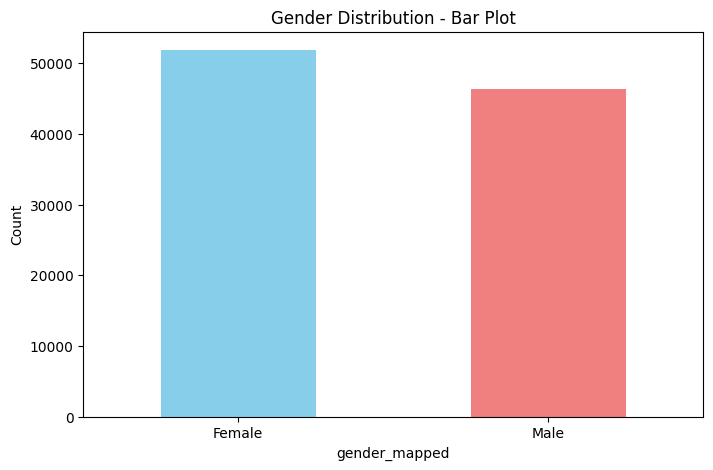

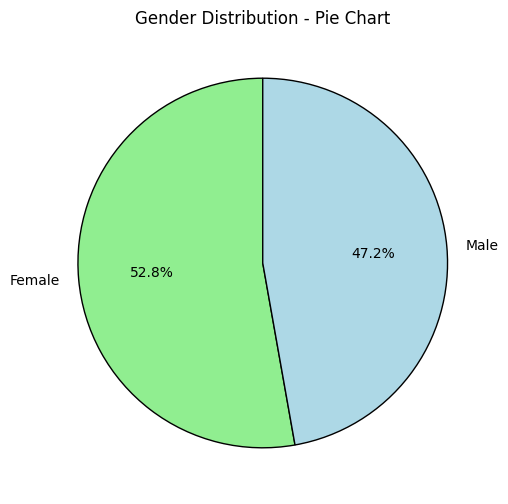

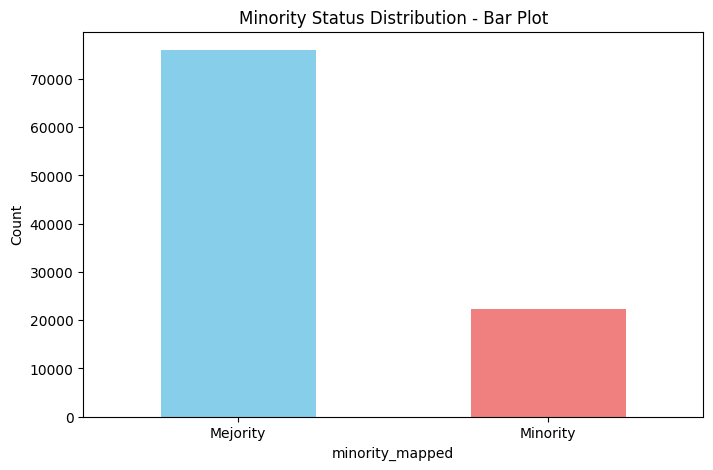

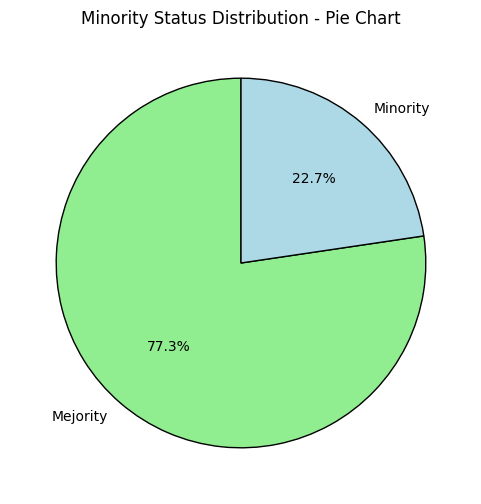

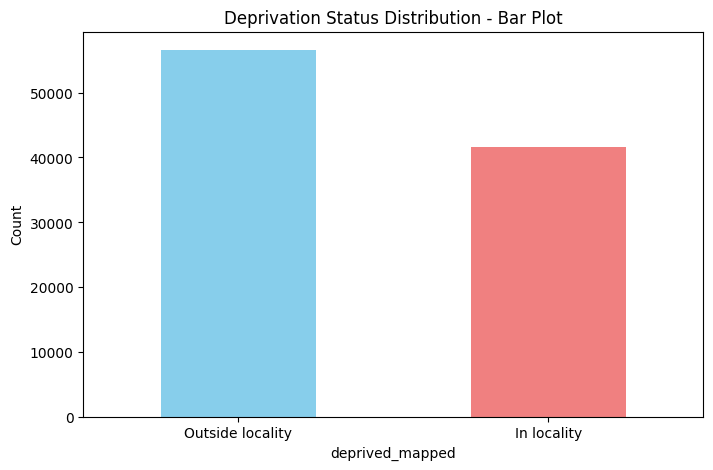

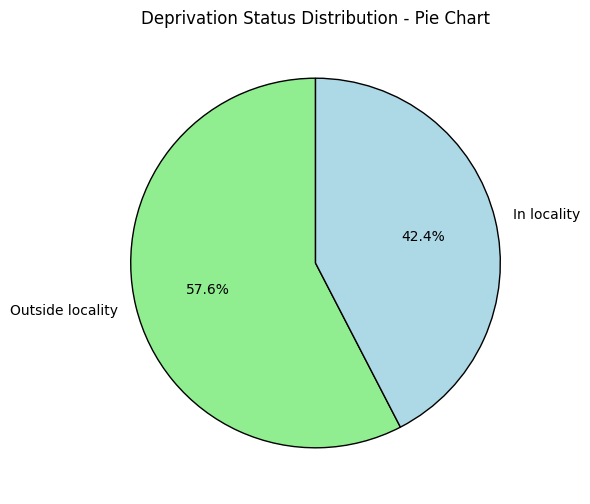

In [8]:

# Descriptive analysis and visualization
def plot_demographic_distribution(df, column, title):
    # Frequency counts
    counts = df[column].value_counts()

    # Bar Plot
    plt.figure(figsize=(8, 5))
    counts.plot(kind='bar', color=['skyblue', 'lightcoral'])
    plt.title(f'{title} - Bar Plot')
    plt.ylabel('Count')
    plt.xlabel(column)
    plt.xticks(rotation=0)
    plt.show()

    # Pie Chart
    plt.figure(figsize=(6, 6))
    counts.plot(kind='pie', autopct='%1.1f%%', colors=['lightgreen', 'lightblue'], startangle=90, wedgeprops={'edgecolor': 'black'})
    plt.title(f'{title} - Pie Chart')
    plt.ylabel('')  # Remove y-label for pie chart
    plt.show()

# Gender distribution
plot_demographic_distribution(merged_df, 'gender_mapped', 'Gender Distribution')

# Minority status distribution
plot_demographic_distribution(merged_df, 'minority_mapped', 'Minority Status Distribution')

# Deprivation status distribution
plot_demographic_distribution(merged_df, 'deprived_mapped', 'Deprivation Status Distribution')


# **Screentime**

In [9]:
screentime = merged_df[['C_wk', 'G_wk', 'S_wk', 'T_wk', 'C_we', 'G_we', 'S_we', 'T_we']]
screentime.describe()

,C_wk,G_wk,S_wk,T_wk,C_we,G_we,S_we,T_we
count,98278.000000,98278.000000,98278.000000,98278.000000,98278.000000,98278.000000,98278.000000,98278.000000
mean,1.768092,0.997828,2.889604,2.551644,2.198483,1.726332,3.504085,3.647439
std,1.722842,1.540496,2.326138,1.686233,2.069802,2.159675,2.490748,1.944612
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.500000,0.000000,1.000000,1.000000,0.500000,0.000000,1.000000,2.000000
50%,1.000000,0.000000,2.000000,2.000000,2.000000,0.500000,3.000000,4.000000
75%,3.000000,2.000000,5.000000,4.000000,3.000000,3.000000,6.000000,5.000000
max,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000


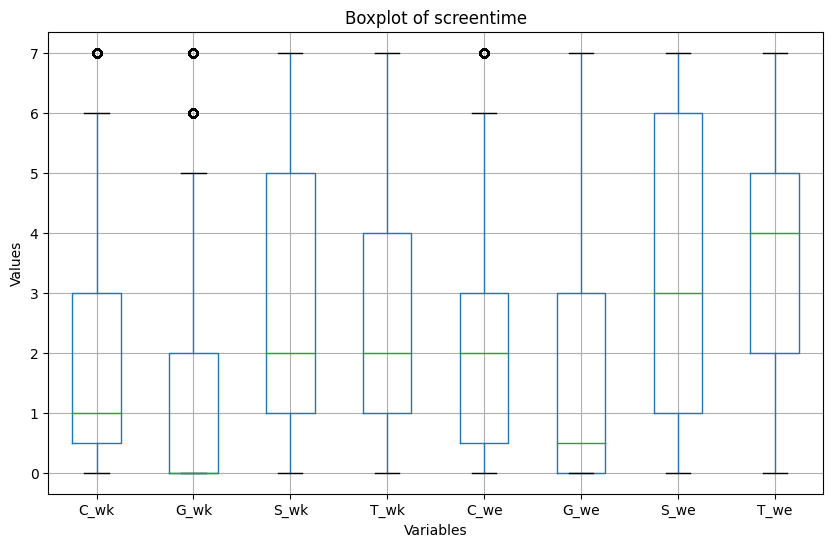

In [10]:
# Create a boxplot
plt.figure(figsize=(10, 6))
screentime.boxplot()

# Add title and labels
plt.title('Boxplot of screentime')
plt.xlabel('Variables')
plt.ylabel('Values')

# Show the plot
plt.show()

# **Wellbing**

In [11]:
wellbeing = merged_df[['Optm', 'Usef', 'Relx', 'Intp', 'Engs', 'Dealpr', 'Thcklr', 'Goodme', 'Clsep', 'Conf', 'Mkmind', 'Loved', 'Intthg', 'Cheer']]

In [12]:
wellbeing.describe()

,Optm,Usef,Relx,Intp,Engs,Dealpr,Thcklr,Goodme,Clsep,Conf,Mkmind,Loved,Intthg,Cheer
count,98278.000000,98278.000000,98278.000000,98278.000000,98278.000000,98278.000000,98278.000000,98278.000000,98278.000000,98278.000000,98278.000000,98278.000000,98278.000000,98278.000000
mean,3.276919,3.107593,3.096502,3.271658,3.046155,3.370693,3.488726,3.271780,3.557348,3.306732,3.851533,3.898950,3.477604,3.496713
std,0.997319,0.951901,1.014054,1.017242,1.075498,1.047807,1.017481,1.125303,1.029892,1.115466,0.973831,1.069087,1.071202,1.011319
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,3.000000,3.000000,2.000000,3.000000,2.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
50%,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,3.000000,4.000000,3.000000,4.000000,4.000000,4.000000,4.000000
75%,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,5.000000,4.000000,4.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [13]:
wellbeing.mode()

,Optm,Usef,Relx,Intp,Engs,Dealpr,Thcklr,Goodme,Clsep,Conf,Mkmind,Loved,Intthg,Cheer
0,3,3,3,4,3,4,4,4,4,4,4,5,4,4


In [14]:
wellbeing.median()

,0
Optm,3.0
Usef,3.0
Relx,3.0
Intp,3.0
Engs,3.0
Dealpr,3.0
Thcklr,4.0
Goodme,3.0
Clsep,4.0
Conf,3.0


In [15]:
mapped_wellbeing = wellbeing.replace({1: 'None of the time', 2: 'Rarely' , 3: 'Some of the times',
                                      4: 'Often', 5: 'All of the time'})

In [16]:
mapped_wellbeing.head()

,Optm,Usef,Relx,Intp,Engs,Dealpr,Thcklr,Goodme,Clsep,Conf,Mkmind,Loved,Intthg,Cheer
0,Some of the times,Often,Some of the times,Often,Often,Often,Often,Often,All of the time,Often,Often,All of the time,Often,Often
1,Often,Often,Some of the times,All of the time,Some of the times,Often,All of the time,Some of the times,All of the time,Often,Often,All of the time,Often,Often
2,Some of the times,Rarely,Some of the times,Some of the times,Some of the times,Some of the times,Some of the times,Some of the times,Often,Some of the times,Some of the times,Some of the times,Often,Often
3,Some of the times,Often,Often,Often,Often,Often,Often,Often,Some of the times,All of the time,Often,All of the time,Often,Often
4,Some of the times,Some of the times,Often,All of the time,Rarely,Some of the times,Some of the times,Often,Often,Some of the times,All of the time,All of the time,All of the time,All of the time


In [17]:
mapped_wellbeing.mode()

,Optm,Usef,Relx,Intp,Engs,Dealpr,Thcklr,Goodme,Clsep,Conf,Mkmind,Loved,Intthg,Cheer
0,Some of the times,Some of the times,Some of the times,Often,Some of the times,Often,Often,Often,Often,Often,Often,All of the time,Often,Often


**Frequency** **distribution**

<ipython-input-19-09d776dbeded>:23: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(i, percentage_distribution[i] + 0.5, f'{percentage_distribution[i]:.2f}%', ha='center', va='bottom')


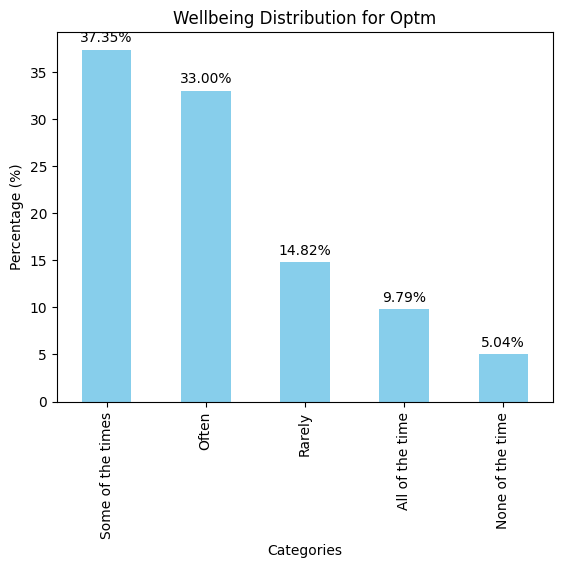

<ipython-input-19-09d776dbeded>:23: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(i, percentage_distribution[i] + 0.5, f'{percentage_distribution[i]:.2f}%', ha='center', va='bottom')


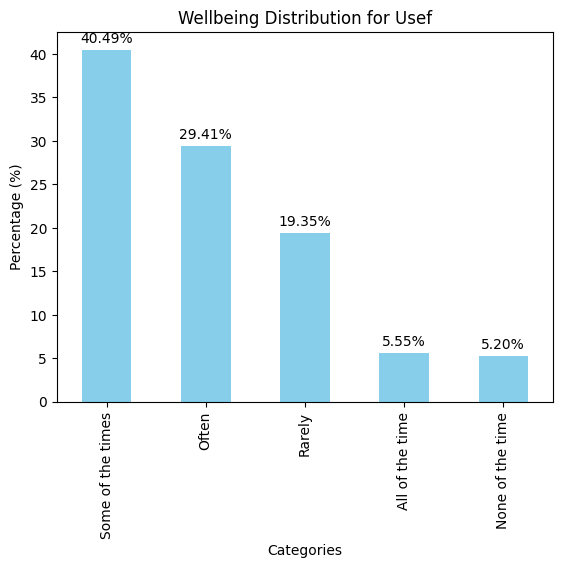

<ipython-input-19-09d776dbeded>:23: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(i, percentage_distribution[i] + 0.5, f'{percentage_distribution[i]:.2f}%', ha='center', va='bottom')


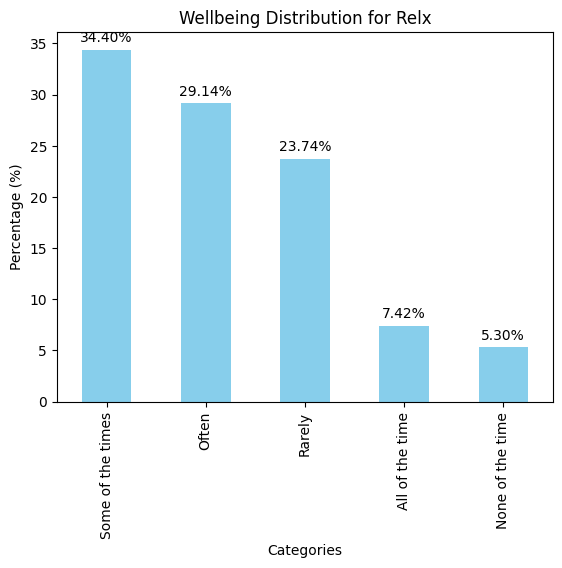

<ipython-input-19-09d776dbeded>:23: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(i, percentage_distribution[i] + 0.5, f'{percentage_distribution[i]:.2f}%', ha='center', va='bottom')


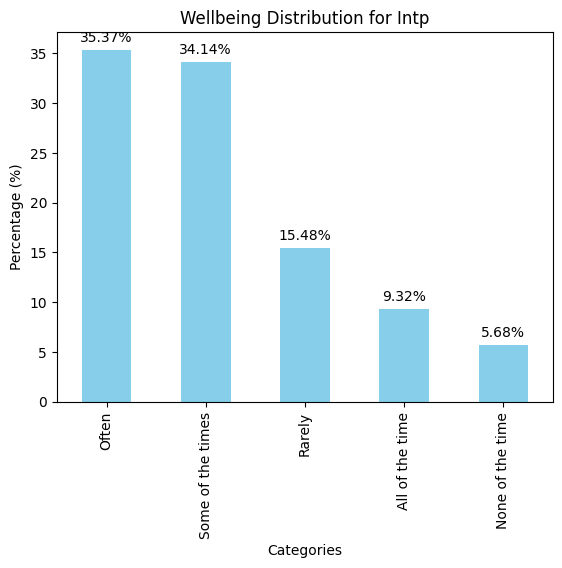

<ipython-input-19-09d776dbeded>:23: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(i, percentage_distribution[i] + 0.5, f'{percentage_distribution[i]:.2f}%', ha='center', va='bottom')


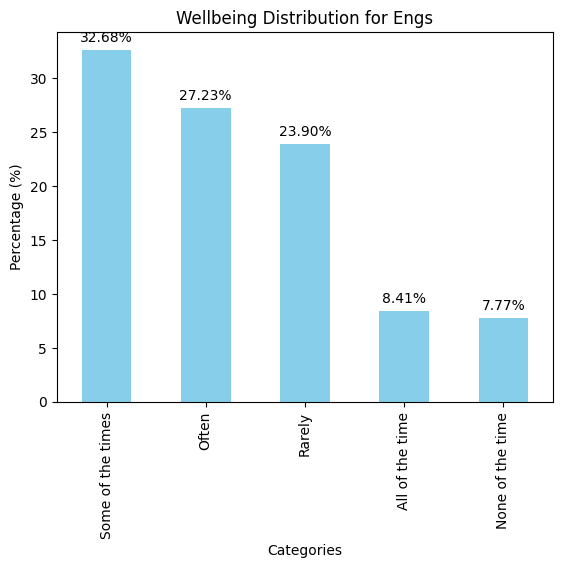

<ipython-input-19-09d776dbeded>:23: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(i, percentage_distribution[i] + 0.5, f'{percentage_distribution[i]:.2f}%', ha='center', va='bottom')


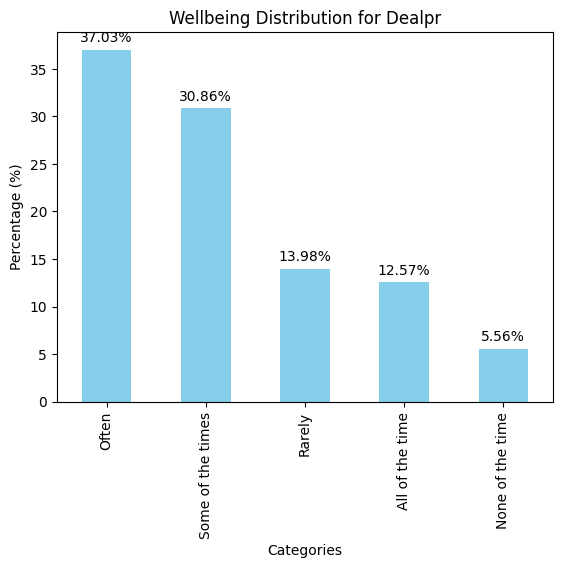

<ipython-input-19-09d776dbeded>:23: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(i, percentage_distribution[i] + 0.5, f'{percentage_distribution[i]:.2f}%', ha='center', va='bottom')


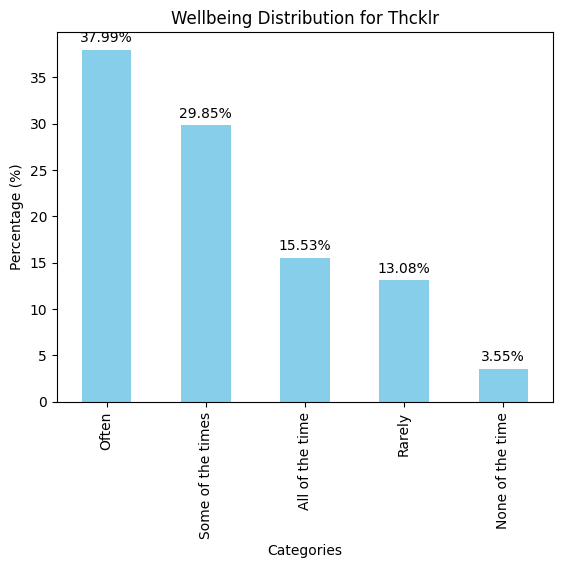

<ipython-input-19-09d776dbeded>:23: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(i, percentage_distribution[i] + 0.5, f'{percentage_distribution[i]:.2f}%', ha='center', va='bottom')


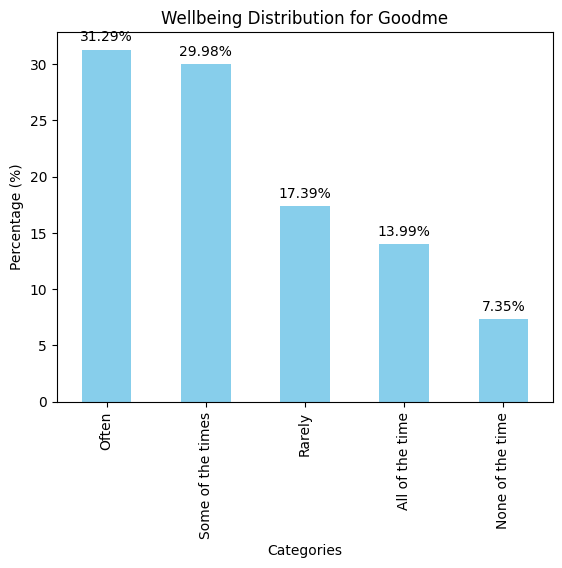

<ipython-input-19-09d776dbeded>:23: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(i, percentage_distribution[i] + 0.5, f'{percentage_distribution[i]:.2f}%', ha='center', va='bottom')


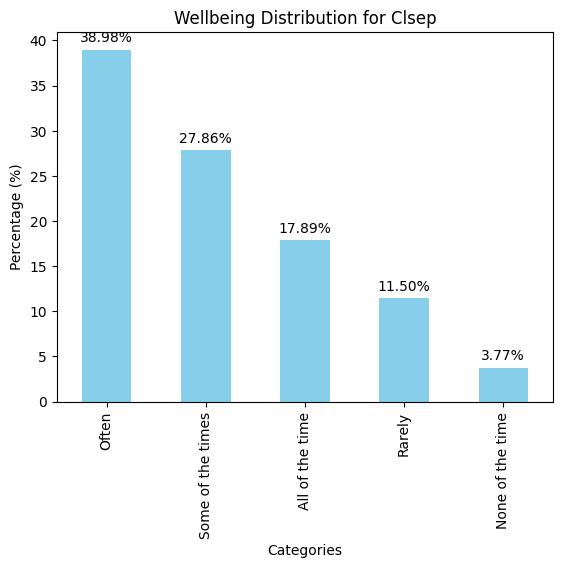

<ipython-input-19-09d776dbeded>:23: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(i, percentage_distribution[i] + 0.5, f'{percentage_distribution[i]:.2f}%', ha='center', va='bottom')


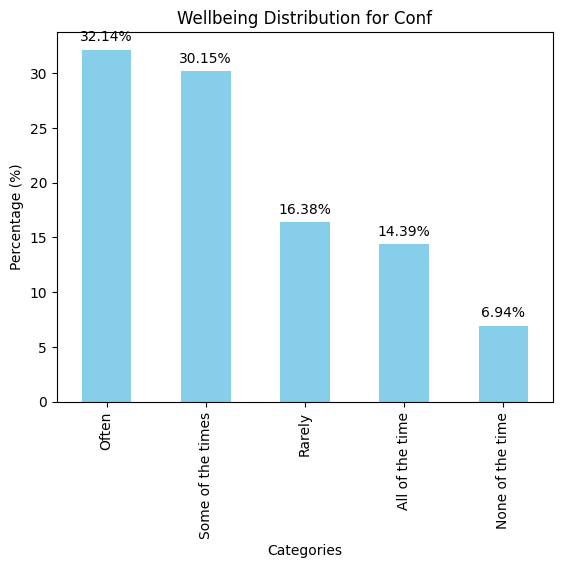

<ipython-input-19-09d776dbeded>:23: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(i, percentage_distribution[i] + 0.5, f'{percentage_distribution[i]:.2f}%', ha='center', va='bottom')


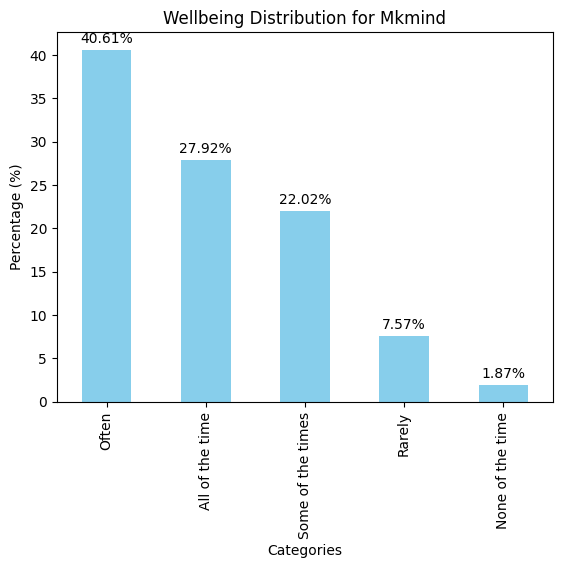

<ipython-input-19-09d776dbeded>:23: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(i, percentage_distribution[i] + 0.5, f'{percentage_distribution[i]:.2f}%', ha='center', va='bottom')


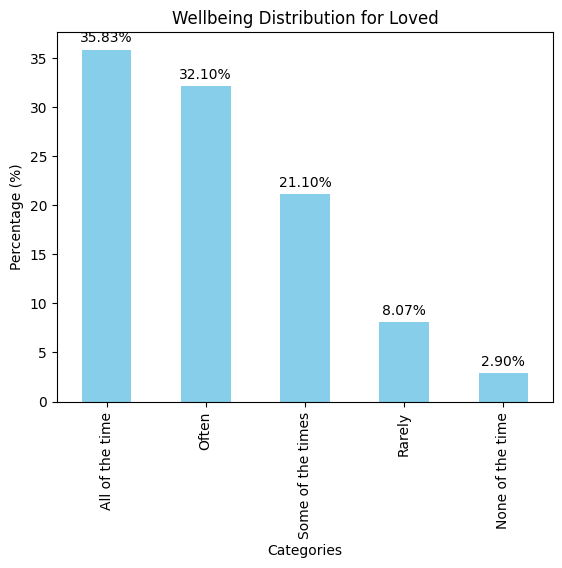

<ipython-input-19-09d776dbeded>:23: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(i, percentage_distribution[i] + 0.5, f'{percentage_distribution[i]:.2f}%', ha='center', va='bottom')


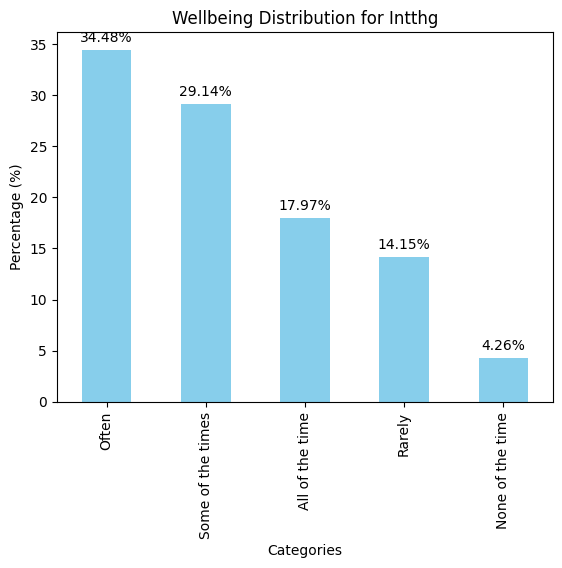

<ipython-input-19-09d776dbeded>:23: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(i, percentage_distribution[i] + 0.5, f'{percentage_distribution[i]:.2f}%', ha='center', va='bottom')


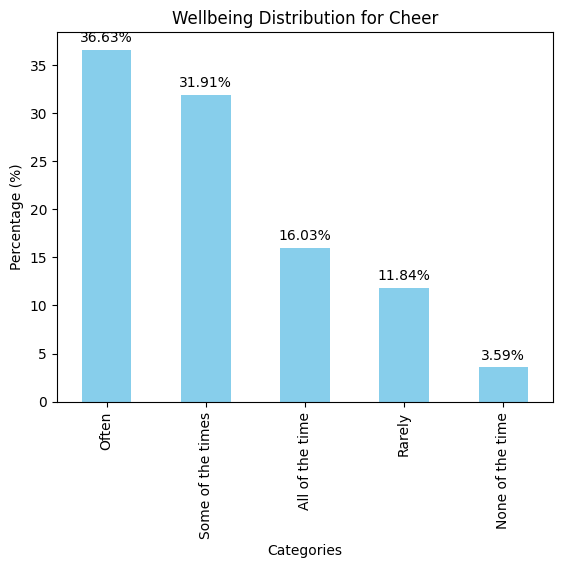

In [19]:
# Function to plot bar chart with percentages

import pandas as pd
import matplotlib.pyplot as plt

def plot_wellbeing_distribution(df, column, title):
    # Frequency counts
    counts = df[column].value_counts()

    # Calculate the percentage distribution
    percentage_distribution = (counts / len(df[column])) * 100 # Changed 'frequency_distribution' to 'counts'

    # Plot the bar chart
    percentage_distribution.plot(kind='bar', color='skyblue')

    # Add labels and title
    plt.xlabel('Categories')
    plt.ylabel('Percentage (%)')
    plt.title(title)

    # Display percentages on top of bars
    for i in range(len(percentage_distribution)):
        plt.text(i, percentage_distribution[i] + 0.5, f'{percentage_distribution[i]:.2f}%', ha='center', va='bottom')

    # Show the plot
    plt.show()

# Call the function to plot the bar chart with percentages
plot_wellbeing_distribution(mapped_wellbeing, 'Optm', 'Wellbeing Distribution for Optm')
plot_wellbeing_distribution(mapped_wellbeing, 'Usef', 'Wellbeing Distribution for Usef')
plot_wellbeing_distribution(mapped_wellbeing, 'Relx', 'Wellbeing Distribution for Relx')
plot_wellbeing_distribution(mapped_wellbeing, 'Intp', 'Wellbeing Distribution for Intp')
plot_wellbeing_distribution(mapped_wellbeing, 'Engs', 'Wellbeing Distribution for Engs')
plot_wellbeing_distribution(mapped_wellbeing, 'Dealpr', 'Wellbeing Distribution for Dealpr')
plot_wellbeing_distribution(mapped_wellbeing, 'Thcklr', 'Wellbeing Distribution for Thcklr')
plot_wellbeing_distribution(mapped_wellbeing, 'Goodme', 'Wellbeing Distribution for Goodme')
plot_wellbeing_distribution(mapped_wellbeing, 'Clsep', 'Wellbeing Distribution for Clsep')
plot_wellbeing_distribution(mapped_wellbeing, 'Conf', 'Wellbeing Distribution for Conf')
plot_wellbeing_distribution(mapped_wellbeing, 'Mkmind', 'Wellbeing Distribution for Mkmind')
plot_wellbeing_distribution(mapped_wellbeing, 'Loved', 'Wellbeing Distribution for Loved')
plot_wellbeing_distribution(mapped_wellbeing, 'Intthg', 'Wellbeing Distribution for Intthg')
plot_wellbeing_distribution(mapped_wellbeing, 'Cheer', 'Wellbeing Distribution for Cheer')



# **Descriptive Analysis : Investigation 2 : Histogram**

# Demographical Data

# Screentime

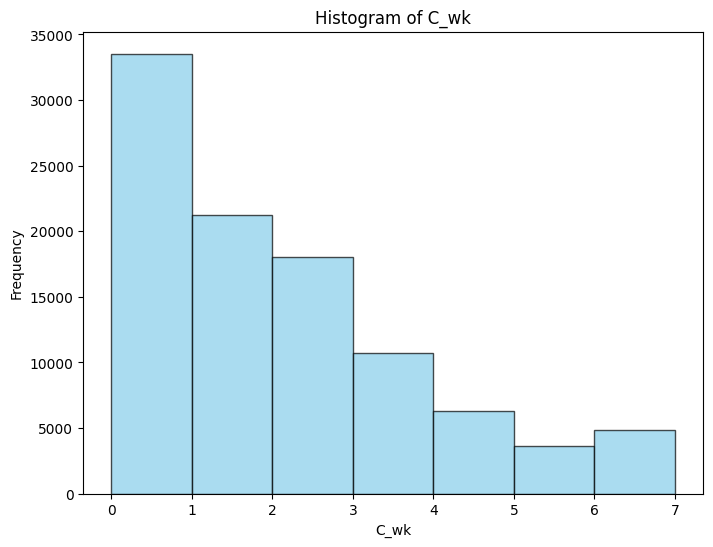

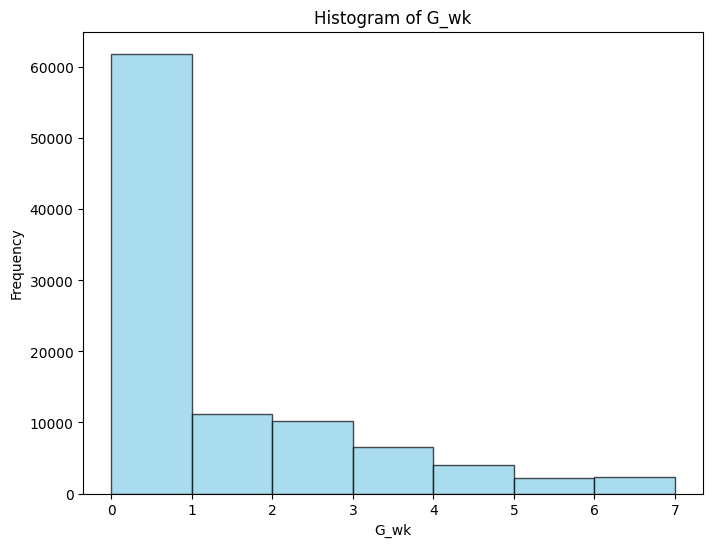

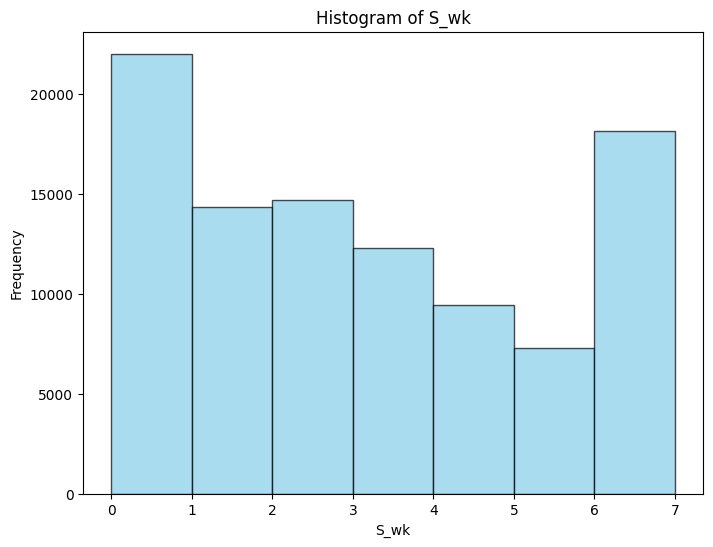

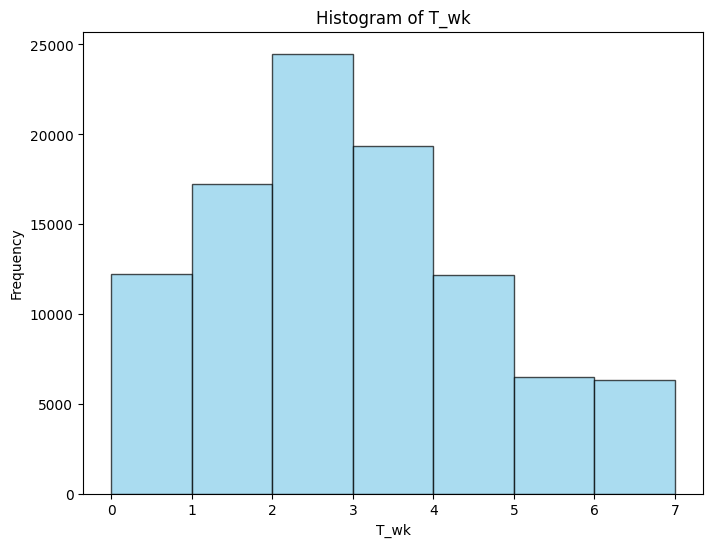

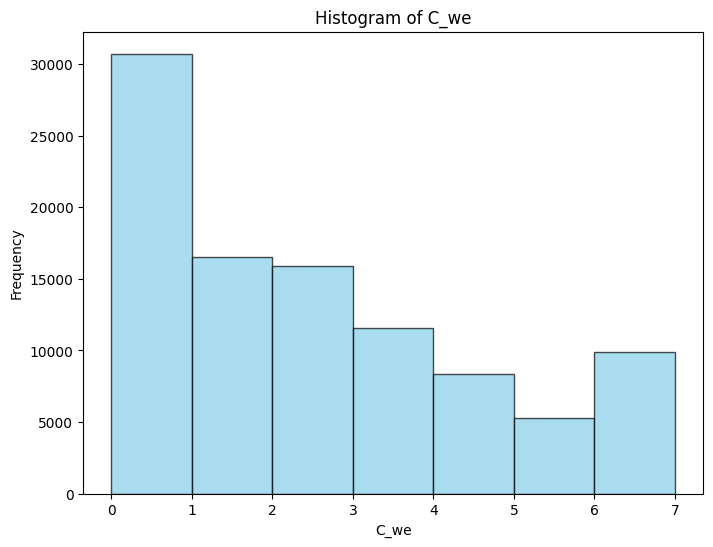

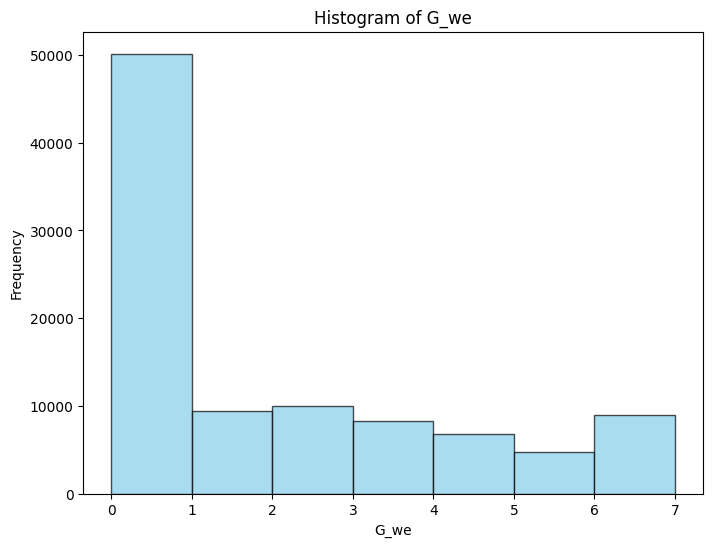

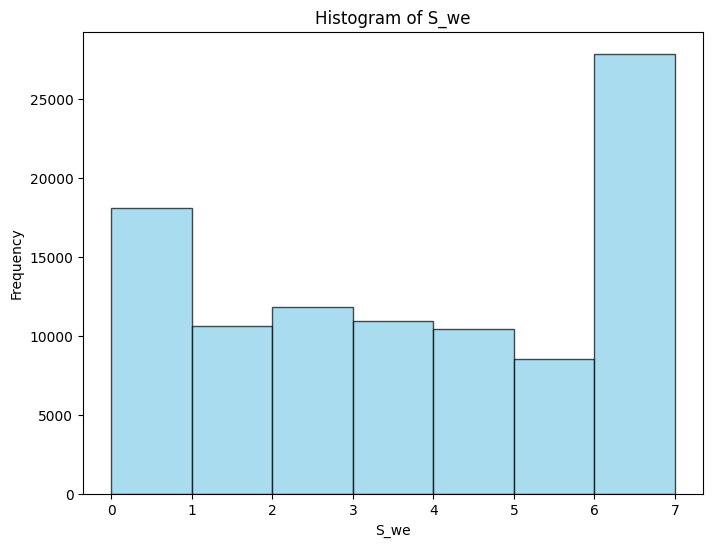

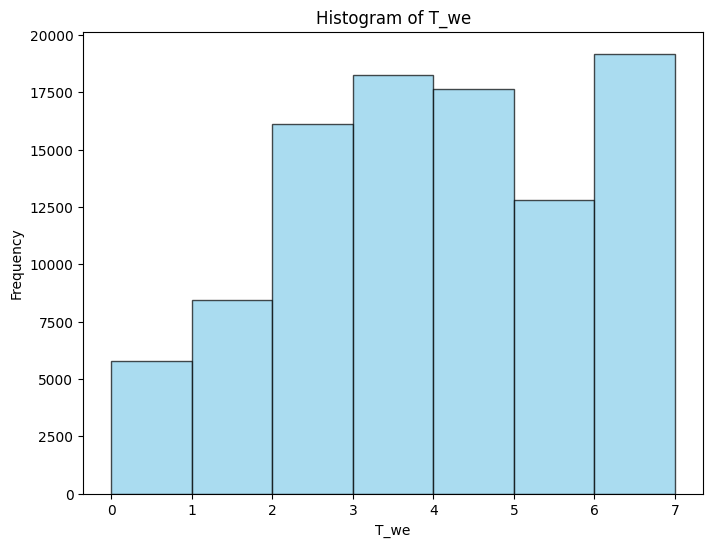

In [20]:
# Function to plot histograms for all columns in a DataFrame
def plot_histograms(df):
    # Loop through each column in the DataFrame
    for column in df.columns:
        # Check if the column contains numeric data
        if pd.api.types.is_numeric_dtype(df[column]):
            # Plot the histogram
            plt.figure(figsize=(8, 6))  # Set the figure size
            plt.hist(df[column], bins=7, color='skyblue', edgecolor='black', alpha=0.7)

            # Add labels and title
            plt.xlabel(column.capitalize())
            plt.ylabel('Frequency')
            plt.title(f'Histogram of {column.capitalize()}')

            # Show the plot
            plt.show()

# Call the function to plot histograms for all numerical columns
plot_histograms(screentime)

# Wellbeing

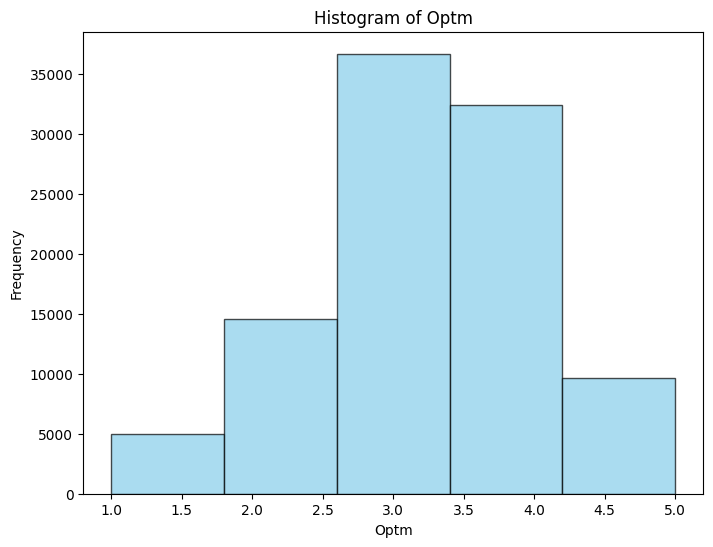

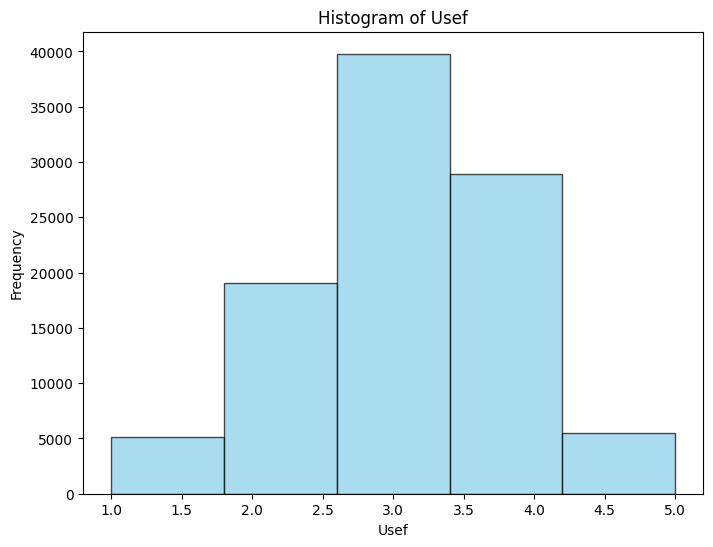

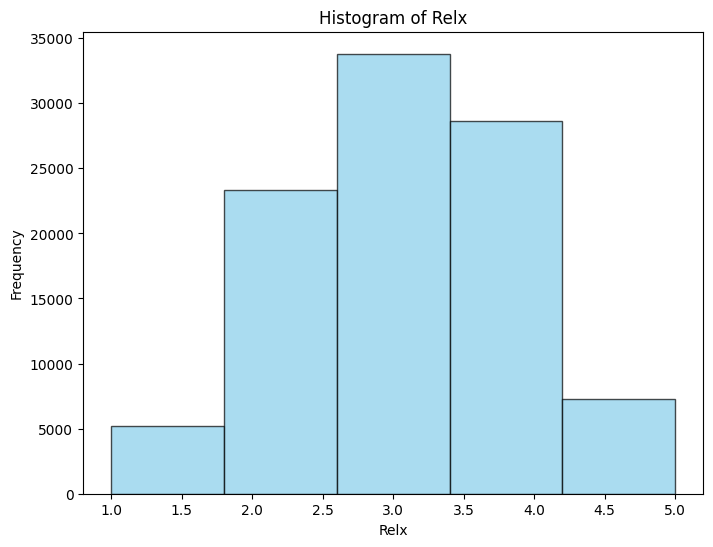

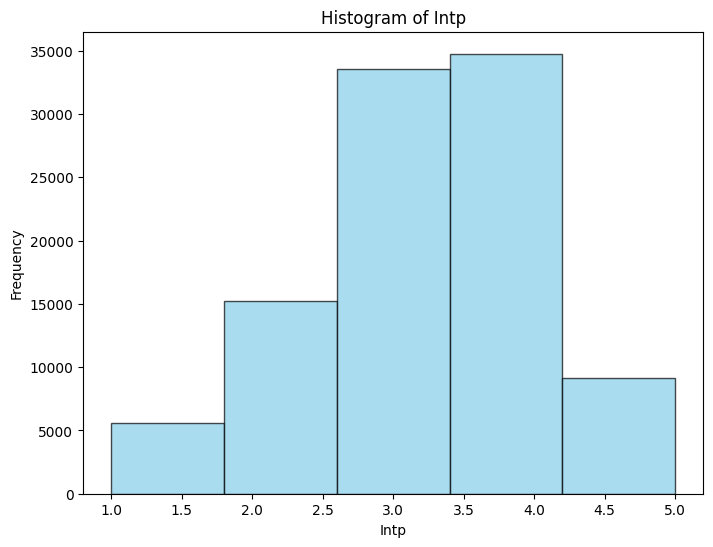

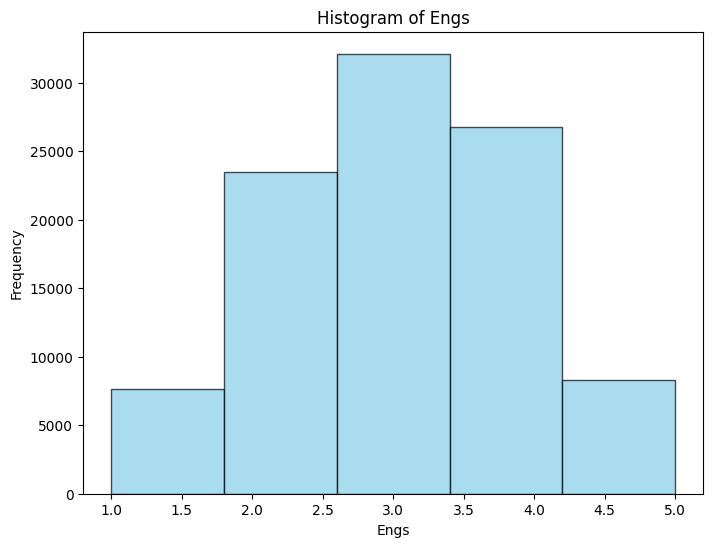

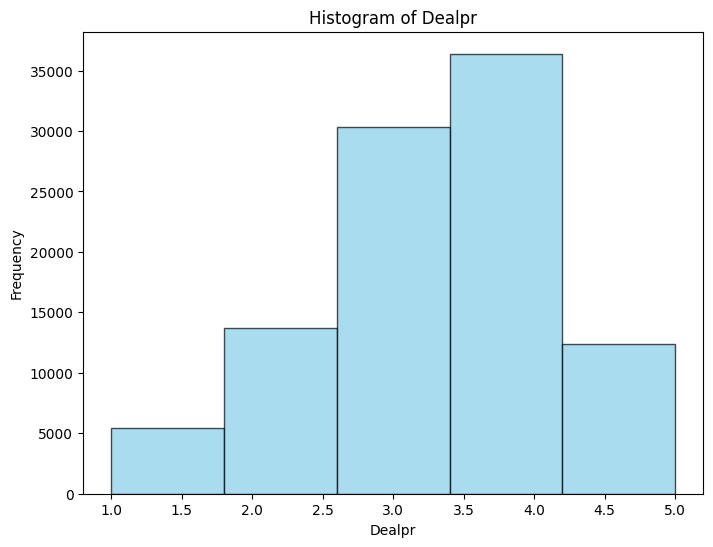

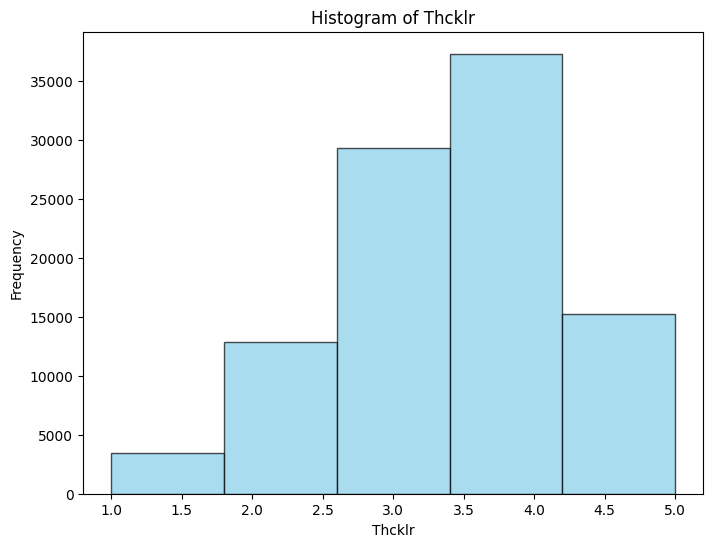

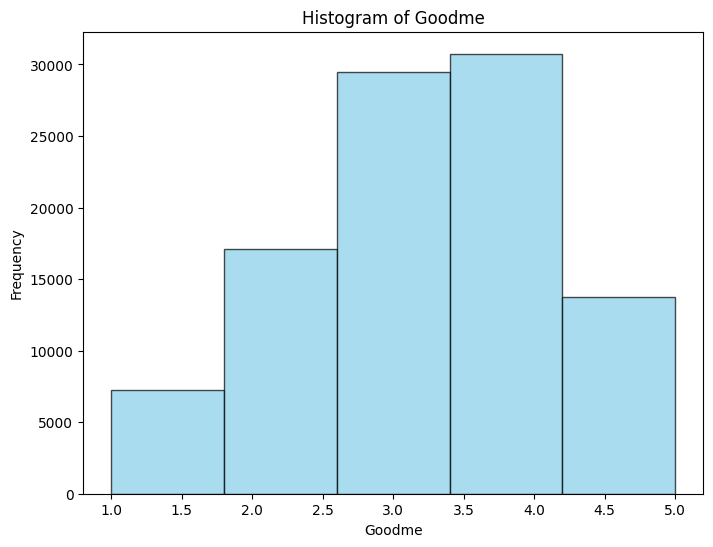

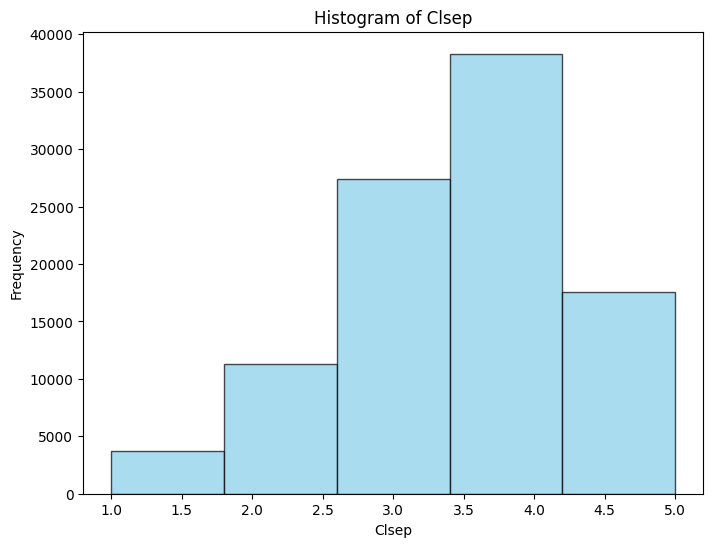

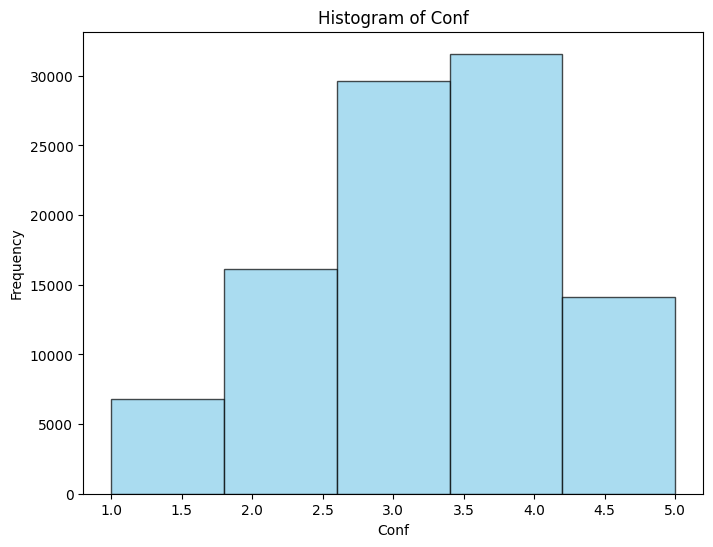

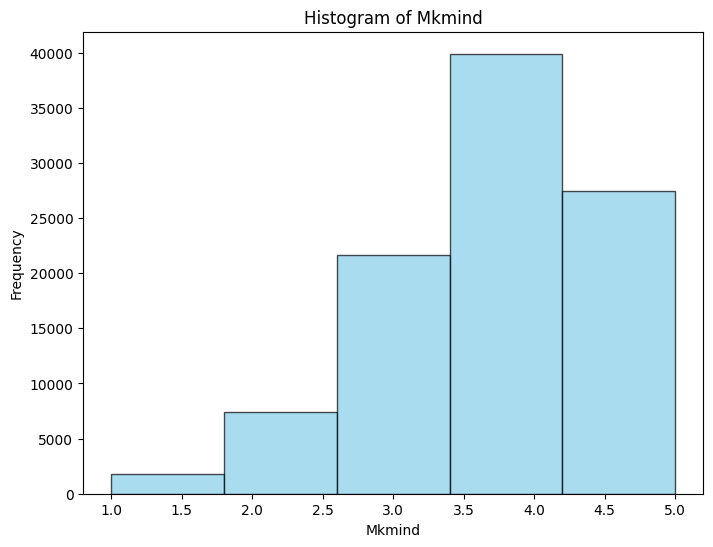

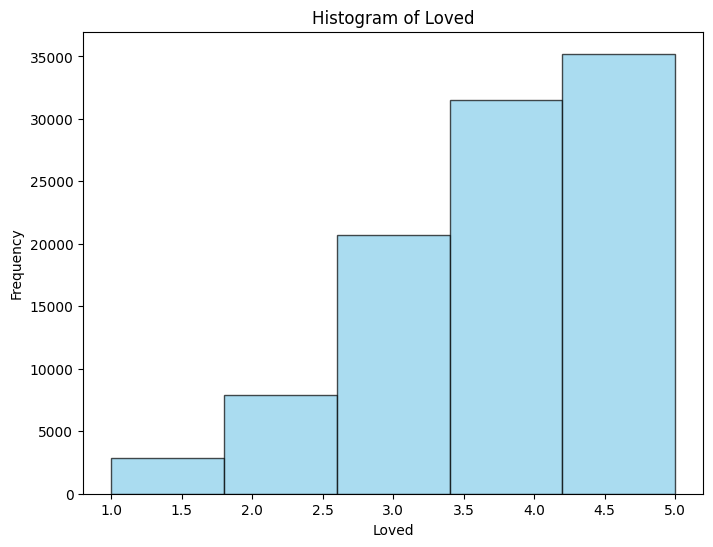

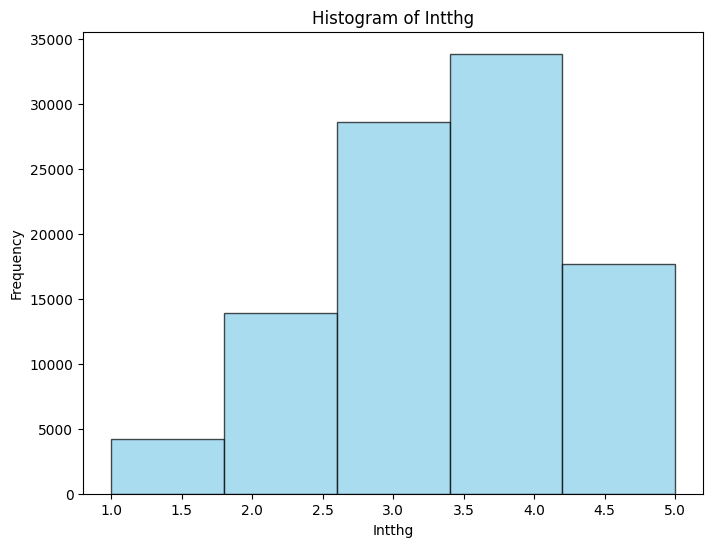

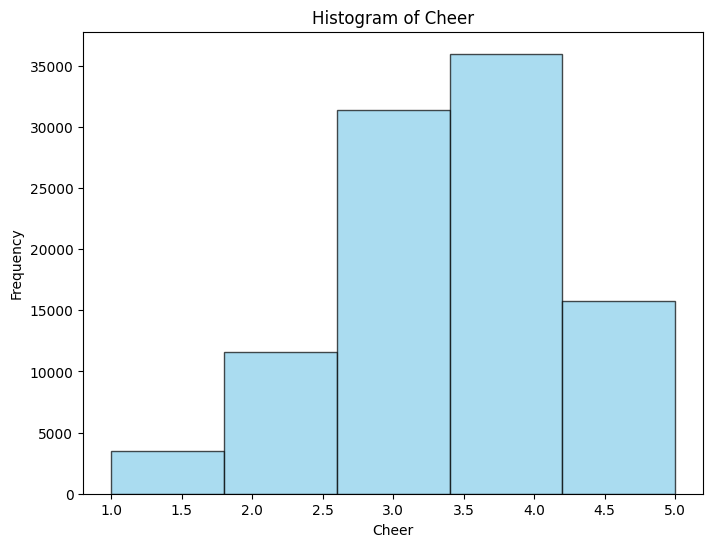

In [21]:
# Function to plot histograms for all columns in a DataFrame
def plot_histograms(df):
    # Loop through each column in the DataFrame
    for column in df.columns:
        # Check if the column contains numeric data
        if pd.api.types.is_numeric_dtype(df[column]):
            # Plot the histogram
            plt.figure(figsize=(8, 6))  # Set the figure size
            plt.hist(df[column], bins=5, color='skyblue', edgecolor='black', alpha=0.7)

            # Add labels and title
            plt.xlabel(column.capitalize())
            plt.ylabel('Frequency')
            plt.title(f'Histogram of {column.capitalize()}')

            # Show the plot
            plt.show()

# Call the function to plot histograms for all numerical columns
plot_histograms(wellbeing)

# **Feature Engineering**

Data Set: Screentime

In [22]:
merged_df['Total_Screen_Time_Weekdays'] = (
    merged_df['C_wk'] +
    merged_df['G_wk'] +
    merged_df['S_wk'] +
    merged_df['T_wk']
)

merged_df['Total_Screen_Time_Weekends'] = (
    merged_df['C_we'] +
    merged_df['G_we'] +
    merged_df['S_we'] +
    merged_df['T_we']
)

merged_df['Total_Screen_Time_weekly'] = merged_df['Total_Screen_Time_Weekdays'] + merged_df['Total_Screen_Time_Weekends']


In [23]:
# Display summary statistics for numerical columns
print(merged_df['Total_Screen_Time_weekly'].describe())
print(merged_df['Total_Screen_Time_Weekdays'].describe())
print(merged_df['Total_Screen_Time_Weekends'].describe())

count    98278.000000
mean        19.283507
std          8.995372
min          0.000000
25%         13.000000
50%         18.000000
75%         24.500000
max         56.000000
Name: Total_Screen_Time_weekly, dtype: float64
count    98278.000000
mean         8.207167
std          4.416450
min          0.000000
25%          5.000000
50%          7.500000
75%         11.000000
max         28.000000
Name: Total_Screen_Time_Weekdays, dtype: float64
count    98278.000000
mean        11.076340
std          4.997821
min          0.000000
25%          7.500000
50%         10.500000
75%         14.000000
max         28.000000
Name: Total_Screen_Time_Weekends, dtype: float64


In [24]:
screentime_feature = merged_df[['Total_Screen_Time_weekly', 'Total_Screen_Time_Weekdays', 'Total_Screen_Time_Weekends']]
screentime_feature.head()

,Total_Screen_Time_weekly,Total_Screen_Time_Weekdays,Total_Screen_Time_Weekends
0,11.0,3.5,7.5
1,12.0,3.0,9.0
2,6.5,2.0,4.5
3,13.5,5.0,8.5
4,10.0,5.0,5.0


Dataset: Wellbeing

In [25]:
merged_df['Total_Wellbeing'] = (merged_df['Optm'] +
    merged_df['Usef'] +
    merged_df['Relx'] +
    merged_df['Intp'] +
    merged_df['Engs'] +
    merged_df['Dealpr']+
    merged_df['Thcklr'] +
    merged_df['Goodme'] +
    merged_df['Clsep'] +
    merged_df['Conf'] +
    merged_df['Mkmind'] +
    merged_df['Loved']+
    merged_df['Intthg'] +
    merged_df['Cheer'])

# Compute Average Well-Being Score
merged_df['Average_Well_Being_Score'] = merged_df['Total_Wellbeing']/14

merged_df['Average_Well_Being_Score'].describe()

,Average_Well_Being_Score
count,98278.000000
mean,3.394208
std,0.680987
min,1.000000
25%,3.000000
50%,3.428571
75%,3.857143
max,5.000000


In [55]:
merged_df['Average_Well_Being_Score'].head()

,Average_Well_Being_Score
0,4.000000
1,4.071429
2,3.142857
3,4.000000
4,3.857143


In [26]:

# Create Well-Being Categories
bins = [0, 2.5, 4, 5]
labels = ['Low', 'Medium', 'High']
merged_df['Well_Being_Category'] = pd.cut(merged_df['Average_Well_Being_Score'], bins=bins, labels=labels)



In [27]:
Wellbeing_feature = merged_df[['Well_Being_Category']]
Wellbeing_feature.head()

,Well_Being_Category
0,Medium
1,High
2,Medium
3,Medium
4,Medium


In [57]:
# Numeric mapping
numeric_mapping = {
    "Low": 1,
    "Medium": 2,
    "High": 3,
}

# Replace ordinal codes with new numeric values
mapped_wellbeing_feature = Wellbeing_feature.applymap(lambda x: numeric_mapping.get(x))

mapped_wellbeing_feature.head()


<ipython-input-57-e642f9812665>:9: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  mapped_wellbeing_feature = Wellbeing_feature.applymap(lambda x: numeric_mapping.get(x))


,Well_Being_Category
0,2
1,3
2,2
3,2
4,2


# **Inferential statistical analyses: Investigation 1**

 ***Confidence Interval ***

In [28]:
import statsmodels.stats.proportion as smp
import numpy as np
import scipy.stats as stats

Demographic data

Gender

In [29]:
num_females = (merged_df['gender'] == 0).sum()
num_males = (merged_df['gender'] == 1).sum()
total_respondants = len(merged_df)

CI for female

In [30]:
# Calculate proportion
prop_females = num_females / total_respondants

# 95% Confidence Interval for the proportion of females
ci_females = smp.proportion_confint(num_females, total_respondants, alpha=0.05)

print(f"Proportion of females: {prop_females}")
print(f"95% Confidence Interval for female proportion: {ci_females}")

Proportion of females: 0.5279411465434787
95% Confidence Interval for female proportion: (0.5248200243966249, 0.5310622686903325)


CI for male

In [31]:
# Calculate proportion
prop_males = num_males / total_respondants

# 95% Confidence Interval for the proportion of males
ci_males = smp.proportion_confint(num_males, total_respondants, alpha=0.05)

print(f"Proportion of males: {prop_males}")
print(f"95% Confidence Interval for male proportion: {ci_males}")

Proportion of males: 0.4720588534565213
95% Confidence Interval for male proportion: (0.46893773130966754, 0.4751799756033751)


Minority

In [59]:
num_minority = (merged_df['minority'] == 1).sum()
num_majority = (merged_df['minority'] == 0).sum()

Minority

In [33]:
# Calculate proportion
prop_minority = num_minority / total_respondants

# 95% Confidence Interval for the proportion of minority
ci_minority = smp.proportion_confint(num_minority, total_respondants, alpha=0.05)

print(f"Proportion of minority: {prop_minority}")
print(f"95% Confidence Interval for minority proportion: {ci_minority}")

Proportion of minority: 0.22657156230285516
95% Confidence Interval for minority proportion: (0.223954387659692, 0.22918873694601832)


Majority

In [60]:
# Calculate proportion
prop_majority = num_majority / total_respondants

# 95% Confidence Interval for the proportion of minority
ci_majority = smp.proportion_confint(num_majority, total_respondants, alpha=0.05)

print(f"Proportion of mejority: {prop_majority}")
print(f"95% Confidence Interval for majority proportion: {ci_mejority}")

Proportion of mejority: 0.7734284376971449
95% Confidence Interval for majority proportion: (0.7708112630539817, 0.776045612340308)


Locality

In [35]:
num_locality = (merged_df['deprived'] == 1).sum()
num_outside_locality = (merged_df['deprived'] == 0).sum()

In locality

In [36]:
# Calculate proportion
prop_locality = num_locality / total_respondants

# 95% Confidence Interval for the proportion of in locality
ci_locality = smp.proportion_confint(num_locality, total_respondants, alpha=0.05)

print(f"Proportion of locality: {prop_locality}")
print(f"95% Confidence Interval for locality proportion: {ci_locality}")

Proportion of locality: 0.4240216528622886
95% Confidence Interval for locality proportion: (0.420931947745975, 0.4271113579786022)


outside locality

In [61]:
# Calculate proportion
prop_outside_locality = num_outside_locality / total_respondants

# 95% Confidence Interval for the proportion of in locality
ci_outside_locality = smp.proportion_confint(num_locality, total_respondants, alpha=0.05)

print(f"Proportion of outside locality: {prop_outside_locality}")
print(f"95% Confidence Interval for outside locality proportion: {ci_outside_locality}")

Proportion of outside locality: 0.5759783471377113
95% Confidence Interval for outside locality proportion: (0.420931947745975, 0.4271113579786022)


**Screentime**

Total_Screen_Time_weekly

In [38]:
# Calculate mean and standard error
mean_Total_Screen_Time_weekly = np.mean(merged_df['Total_Screen_Time_weekly'])
std_err_Total_Screen_Time_weekly = stats.sem(merged_df['Total_Screen_Time_weekly'])  # Standard error of the mean

# 95% Confidence Interval
ci_Total_Screen_Time_weekly = stats.t.interval(0.95, len(merged_df['Total_Screen_Time_weekly'])-1, loc=mean_Total_Screen_Time_weekly, scale=std_err_Total_Screen_Time_weekly)

print(f"Screen Time Mean: {mean_Total_Screen_Time_weekly}")
print(f"95% Confidence Interval for Screen Time: {ci_Total_Screen_Time_weekly}")

Screen Time Mean: 19.283506990374246
95% Confidence Interval for Screen Time: (19.227267109276582, 19.33974687147191)


Total_Screen_Time_Weekdays

In [39]:
# Calculate mean and standard error
mean_Total_Screen_Time_Weekdays = np.mean(merged_df['Total_Screen_Time_Weekdays'])
std_err_Total_Screen_Time_Weekdays = stats.sem(merged_df['Total_Screen_Time_Weekdays'])  # Standard error of the mean

# 95% Confidence Interval
ci_Total_Screen_Time_Weekdays = stats.t.interval(0.95, len(merged_df['Total_Screen_Time_Weekdays'])-1, loc=mean_Total_Screen_Time_Weekdays, scale=std_err_Total_Screen_Time_Weekdays)

print(f"Screen Time Mean: {mean_Total_Screen_Time_Weekdays}")
print(f"95% Confidence Interval for Screen Time: {ci_Total_Screen_Time_Weekdays}")

Screen Time Mean: 8.207167423024481
95% Confidence Interval for Screen Time: (8.179555378407322, 8.23477946764164)


Total_Screen_Time_Weekends

In [40]:
# Calculate mean and standard error
mean_Total_Screen_Time_Weekends = np.mean(merged_df['Total_Screen_Time_Weekends'])
std_err_Total_Screen_Time_Weekends = stats.sem(merged_df['Total_Screen_Time_Weekends'])  # Standard error of the mean

# 95% Confidence Interval
ci_Total_Screen_Time_Weekends = stats.t.interval(0.95, len(merged_df['Total_Screen_Time_Weekends'])-1, loc=mean_Total_Screen_Time_Weekends, scale=std_err_Total_Screen_Time_Weekends)

print(f"Screen Time Mean: {mean_Total_Screen_Time_Weekends}")
print(f"95% Confidence Interval for Screen Time: {ci_Total_Screen_Time_Weekends}")

Screen Time Mean: 11.076339567349763
95% Confidence Interval for Screen Time: (11.045092736060058, 11.107586398639468)


# **Wellbeing**

Wellbeing

In [43]:
# Calculate median
median_well_being = np.median(mapped_wellbeing_feature[['Well_Being_Category']])

# Calculate the percentile-based confidence interval (using bootstrapping)
ci_well_being = np.percentile(mapped_wellbeing_feature[['Well_Being_Category']], [2.5, 97.5])

print(f"Well-Being Median: {median_well_being}")
print(f"95% Percentile-Based Confidence Interval for Well-Being: {ci_well_being}")

Well-Being Median: 2.0
95% Percentile-Based Confidence Interval for Well-Being: [1. 3.]


Inferential Statistical Analysis: Investigation 2

# **Ordinal Logistic** **Regression**

In [44]:
# Assuming screentime_feature and demographic are pandas DataFrames
X = pd.concat([screentime_feature, demographic], axis=1) # Concatenate the DataFrames


Welbeing

Wellbeing and screentime

In [45]:
import statsmodels.api as sm
from statsmodels.miscmodels.ordinal_model import OrderedModel
import pandas as pd # Import pandas


# Fit the ordinal logistic regression model
model = OrderedModel(mapped_wellbeing_feature , screentime_feature , distr='logit')
result = model.fit()

# Print the summary
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.758414
         Iterations: 161
         Function evaluations: 270
                              OrderedModel Results                             
Dep. Variable:     Well_Being_Category   Log-Likelihood:                -74535.
Model:                    OrderedModel   AIC:                         1.491e+05
Method:             Maximum Likelihood   BIC:                         1.491e+05
Date:                 Thu, 19 Sep 2024                                         
Time:                         10:11:35                                         
No. Observations:                98278                                         
Df Residuals:                    98273                                         
Df Model:                            3                                         
                                 coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


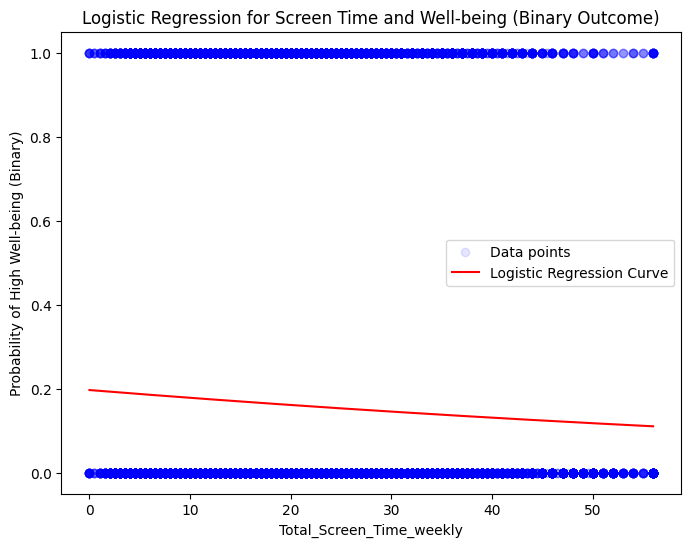

In [46]:
import statsmodels.api as sm
from statsmodels.miscmodels.ordinal_model import OrderedModel
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

# Dichotomize the ordinal variable (example: 1 = low, 3 = high)
merged_df['wellbeing_binary'] = mapped_wellbeing_feature.map(lambda x: 1 if x == 3 else 0)  # Dichotomize: 3=high (1), 1/2=low/medium (0)

log_reg = LogisticRegression()
log_reg.fit(screentime_feature, merged_df['wellbeing_binary'])

# Step 3: Predict probabilities for one variable (screen_time1) for visualization
X_range = np.linspace(screentime_feature['Total_Screen_Time_weekly'].min(), screentime_feature['Total_Screen_Time_weekly'].max(), 300).reshape(-1, 1)
median_weekdays = np.full((300, 2), [np.median(screentime_feature['Total_Screen_Time_Weekdays']),
                                     np.median(screentime_feature['Total_Screen_Time_Weekends'])])

y_prob = log_reg.predict_proba(np.concatenate((X_range, median_weekdays), axis=1))[:, 1]

# Step 4: Plot the logistic regression curve for Total_Screen_Time_weekly
plt.figure(figsize=(8, 6))
plt.scatter(screentime_feature['Total_Screen_Time_weekly'], merged_df['wellbeing_binary'], alpha=0.1, label='Data points', color='blue')
plt.plot(X_range, y_prob, color='red', label='Logistic Regression Curve')
plt.xlabel('Total_Screen_Time_weekly')
plt.ylabel('Probability of High Well-being (Binary)')
plt.title('Logistic Regression for Screen Time and Well-being (Binary Outcome)')
plt.legend()
plt.show()

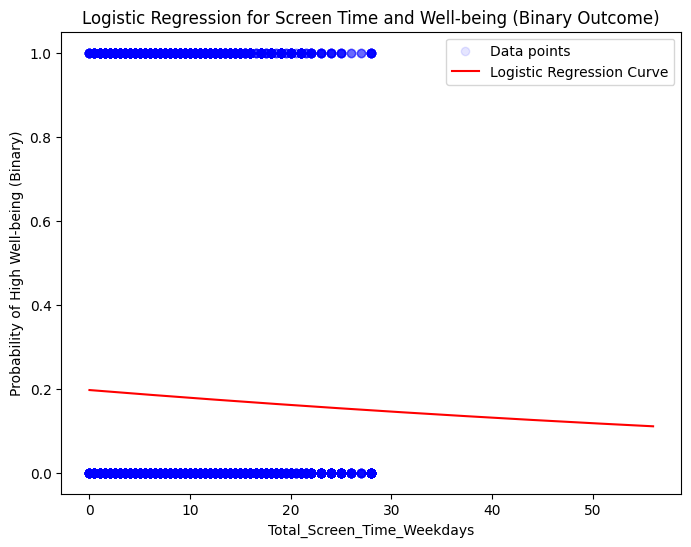

In [47]:
# Step 4: Plot the logistic regression curve for Total_Screen_Time_Weekdays
plt.figure(figsize=(8, 6))
plt.scatter(screentime_feature['Total_Screen_Time_Weekdays'], merged_df['wellbeing_binary'], alpha=0.1, label='Data points', color='blue')
plt.plot(X_range, y_prob, color='red', label='Logistic Regression Curve')
plt.xlabel('Total_Screen_Time_Weekdays')
plt.ylabel('Probability of High Well-being (Binary)')
plt.title('Logistic Regression for Screen Time and Well-being (Binary Outcome)')
plt.legend()
plt.show()

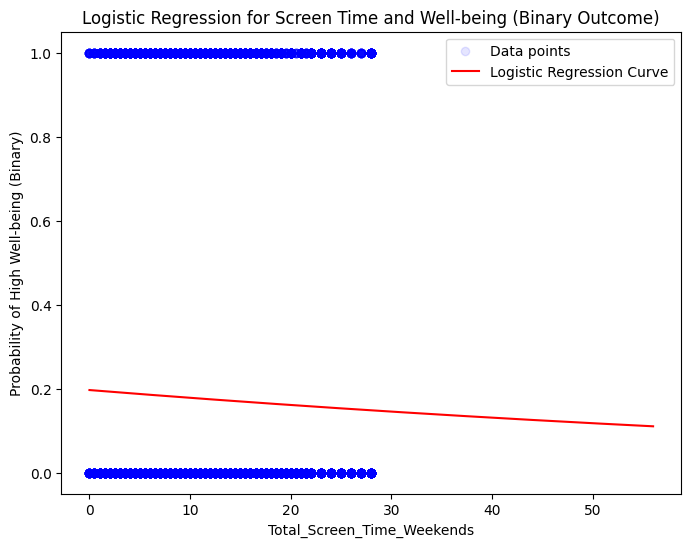

In [48]:
# Step 4: Plot the logistic regression curve for screen_time1
plt.figure(figsize=(8, 6))
plt.scatter(screentime_feature['Total_Screen_Time_Weekends'], merged_df['wellbeing_binary'], alpha=0.1, label='Data points', color='blue')
plt.plot(X_range, y_prob, color='red', label='Logistic Regression Curve')
plt.xlabel('Total_Screen_Time_Weekends')
plt.ylabel('Probability of High Well-being (Binary)')
plt.title('Logistic Regression for Screen Time and Well-being (Binary Outcome)')
plt.legend()
plt.show()